In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from scipy import interpolate

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
import numpy as np

In [3]:
!ls splib07a_Melting_snow_mSnw01a+0.5_veg_ASDFRa_AREF/

Melting_snow_mSnw01a+0.5_veg_ASDFRa_AREF.html
README
photo_images
splib07a_Bandpass_(FWHM)_ASDFR_StandardResolution.gif
splib07a_Bandpass_(FWHM)_ASDFR_StandardResolution.txt
splib07a_Melting_snow_mSnw01a+0.5_veg_ASDFRa_AREF.gif
splib07a_Melting_snow_mSnw01a+0.5_veg_ASDFRa_AREF.txt
splib07a_Melting_snow_mSnw01a+0.5_veg_ASDFRa_AREF_range1_uv_to_vis.gif
splib07a_Melting_snow_mSnw01a+0.5_veg_ASDFRa_AREF_range2_vis_to_swir.gif
splib07a_Melting_snow_mSnw01a+0.5_veg_ASDFRa_AREF_range3_swir.gif
splib07a_Wavelengths_ASD_0.35-2.5_microns_2151_ch.gif
splib07a_Wavelengths_ASD_0.35-2.5_microns_2151_ch.txt


In [4]:
spec_data = pd.read_html("splib07a_Melting_snow_mSnw01a+0.5_veg_ASDFRa_AREF/README/README.htm", header=0)[0]

In [5]:
snowReflectance = pd.read_table("splib07a_Melting_snow_mSnw01a+0.5_veg_ASDFRa_AREF/splib07a_Melting_snow_mSnw01a+0.5_veg_ASDFRa_AREF.txt", names=['reflectance'], header=0)

In [6]:
snowReflectance.columns

Index(['reflectance'], dtype='object')

In [7]:
wavelengthRange = spec_data[spec_data.Characterstring == "ASDFR"]
wavelengthRange

,Characterstring,Spectrometer,Wavelength range(microns),Numberof channels
0,ASDFR,Analytical Spectral Devices (ASD) standard res...,0.35 to 2.5,2151


In [8]:
snowReflectance

,reflectance
0,0.421710
1,0.421736
2,0.423750
3,0.425072
4,0.425015
...,...
2146,0.014012
2147,0.013950
2148,0.013894
2149,0.013842


In [9]:
snowReflectance['wavelength'] = np.linspace(0.35, 2.5, 2151)


In [10]:
snowReflectance

,reflectance,wavelength
0,0.421710,0.350
1,0.421736,0.351
2,0.423750,0.352
3,0.425072,0.353
4,0.425015,0.354
...,...,...
2146,0.014012,2.496
2147,0.013950,2.497
2148,0.013894,2.498
2149,0.013842,2.499


(0, 1)

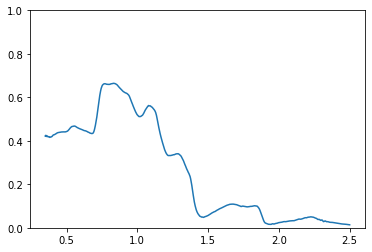

In [11]:
plt.plot(snowReflectance.wavelength, snowReflectance.reflectance)
plt.ylim([0, 1])

In [12]:
usgs_snow_fine = pd.read_csv("fine-snow-usgs.csv", header=None, names=['wavelength', 'reflectance'])

In [13]:
usgs_snow_fine

,wavelength,reflectance
0,0.358899,98.696583
1,0.400000,98.913700
2,0.458716,99.128364
3,0.482202,99.125093
4,0.542385,98.782449
...,...,...
101,2.344954,9.060642
102,2.380183,7.495847
103,2.422752,6.375712
104,2.457982,5.702282


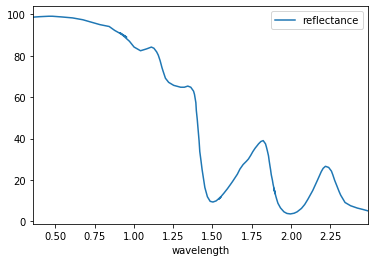

In [14]:
usgs_snow_fine.plot('wavelength')

In [15]:
original_snow = pd.read_csv("original_snow2.csv", header=None, names=['wavelength', 'reflect_snow'])

In [16]:
original_snow

,wavelength,reflect_snow
0,-1.037307,92.439489
1,-0.877774,92.285262
2,-0.718163,92.696535
3,-0.558530,93.262035
4,-0.398954,93.416262
...,...,...
82,10.278790,4.735538
83,10.438509,5.917948
84,10.598235,7.151766
85,10.757904,7.974312


In [17]:
original_rock = pd.read_csv("original_rock2.csv", header=None, names=['wavelength', 'reflect_rock'])

In [18]:
original_rock

,wavelength,reflect_rock
0,-0.141386,33.524643
1,0.018390,35.118325
2,0.178181,36.814826
3,0.337835,37.534554
4,0.497547,38.665554
...,...,...
70,9.534162,4.427083
71,9.693759,4.735538
72,9.853256,4.324265
73,10.012781,4.118629


In [19]:
original_veg = pd.read_csv("vegetation-original.csv", header=None, names=['wavelength', 'reflect_veg'])

In [24]:
veg_interp = interpolate.interp1d(original_veg.wavelength, original_veg.reflect_veg, kind='cubic')
snow_interp = interpolate.interp1d(original_snow.wavelength, original_snow.reflect_snow, kind='linear')
rock_interp = interpolate.interp1d(original_rock.wavelength, original_rock.reflect_rock, kind='linear')

In [25]:
veg_smooth = make_interp_spline(original_veg.wavelength, original_veg.reflect_veg, k=3)
snow_smooth = make_interp_spline(original_snow.wavelength, original_snow.reflect_snow, k=2)
rock_smooth = make_interp_spline(original_rock.wavelength, original_rock.reflect_rock, k=2)

In [51]:
dove_image = mpimg.imread("dove.png")

In [236]:
band_height = 6
MODIS_loc = 72
PLANET_loc = 43
SENTINEL_loc = 58
SENTINEL_20m_loc = 20

MODIS_BANDS = [
    (1, 0.62, 0.67-0.62),
    (2, 0.841, 0.876 - 0.841),
    (3, 0.459, 0.479-0.459),
    (4, 0.545, 0.565-0.545), 
    (5, 1.230, 1.250 - 1.230),
    (6, 1.628, 1.652-1.628),
    (7, 2.105, 2.155-2.105)
]
modis_rects = [
    patches.Rectangle((b[1], MODIS_loc), width=b[2], height=band_height) for b in MODIS_BANDS
]


PLANET_BANDS = [
    (1, 0.45, 0.515-0.45),
    (2, 0.5, 0.59-0.5),
    (3, 0.59, 0.670-0.59),
    (4, 0.78, 0.86-0.78)
]

planet_rects = [
    patches.Rectangle((b[1], PLANET_loc), width=b[2], height=band_height, edgecolor='black', facecolor='none', fill=None, linewidth=0.2) for b in PLANET_BANDS
]

SENTINEL_BANDS = [
    (2, (0.4924 - 0.066/2), 0.066), 
    (3, (0.5598 - 0.036/2), 0.036), 
    (4, (0.6646 - 0.031/2),  0.031), 
    (8, (0.8328 - 0.106/2),  0.106)
]

sentinel_rects = [
    patches.Rectangle((b[1], SENTINEL_loc), width=b[2], height=band_height, edgecolor='black', facecolor='none', fill=None, linewidth=0.2) for b in SENTINEL_BANDS
]
sentinel_rects_max_x = max([i.get_x() + i.get_width() for i in sentinel_rects])

SENTINEL_20M = [
    (5, (0.7041 - 0.015/2), 0.015),
    (6, (0.7405 - 0.015/2), 0.015),
    (7, (0.7828 - 0.020/2), 0.020),
    ('8a', (0.8647 - 0.021/2), 0.021),
    (11, (1.1637 - 0.091/2), 0.091),
#     (12, (2.2024 - 0.175/2), 2.2024)

]
sentinel_20m_rects = [
    patches.Rectangle((b[1], SENTINEL_20m_loc), width=b[2], height=band_height, edgecolor='black', facecolor='none', fill=None, linewidth=0.2) for b in SENTINEL_20M
]

sentinel_20m_rects_max_x = max([i.get_x() + i.get_width() for i in sentinel_20m_rects])


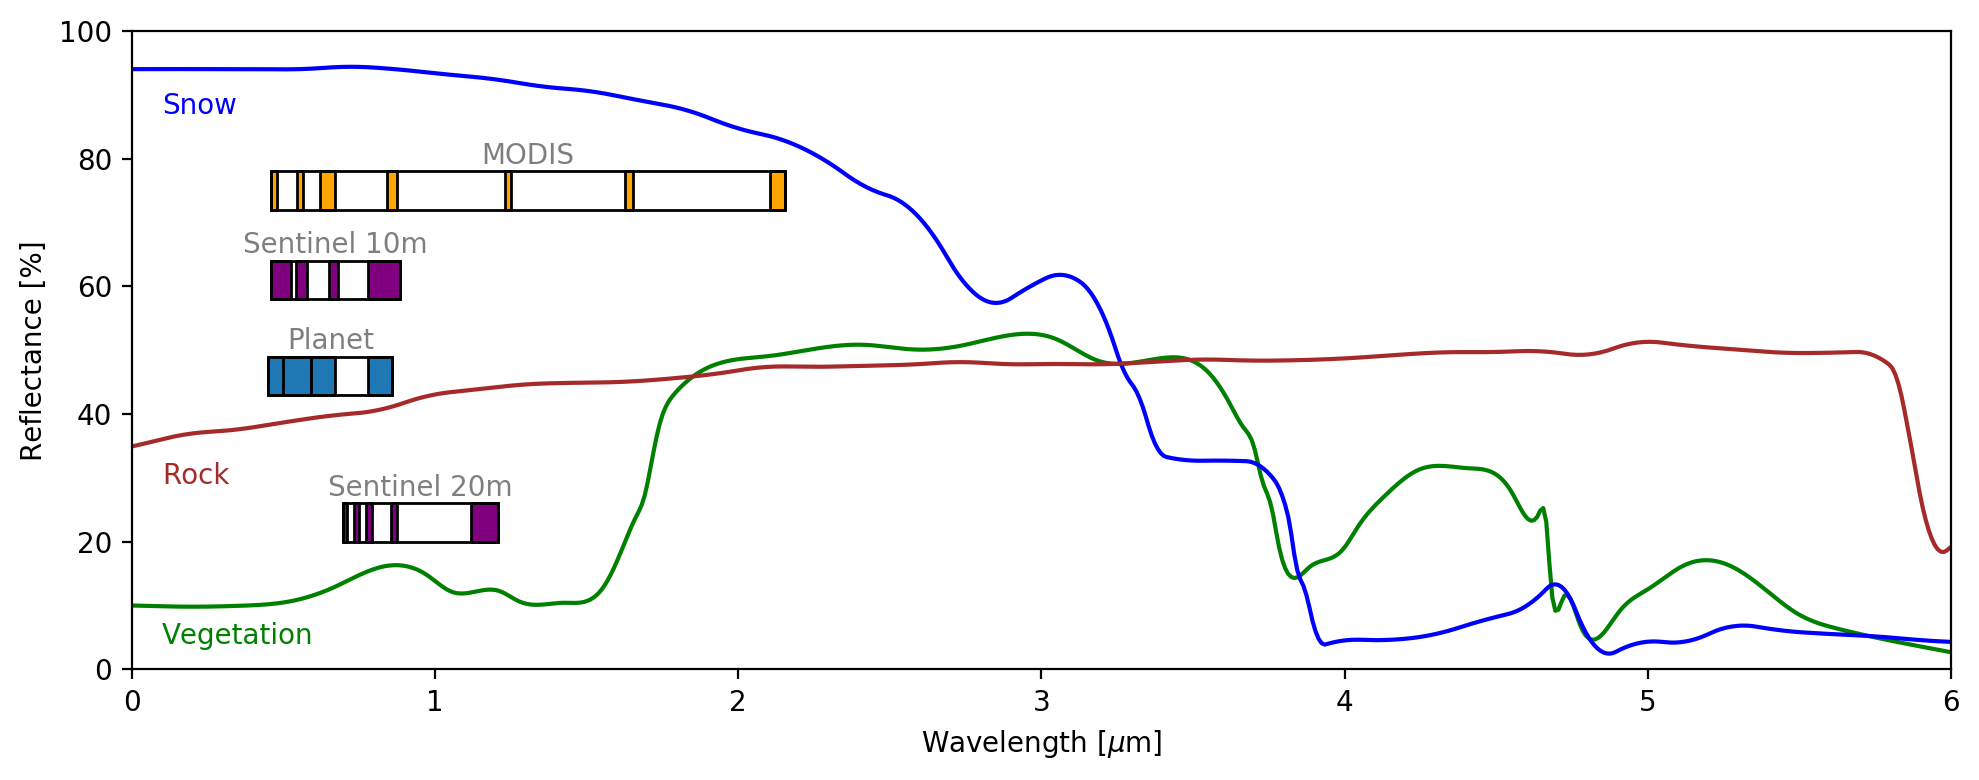

In [238]:
X = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)

# ax.plot(original_veg.wavelength, original_veg.reflect_veg, color='green')
ax.plot(X, veg_smooth(X), color='green')
ax.plot(X, snow_smooth(X), color='blue')
ax.plot(X, rock_smooth(X), color='brown')

ax.text(0.1, 87, "Snow", color='blue')
ax.text(0.1, 29, "Rock", color='brown')
ax.text(0.1, 4, "Vegetation", color='green')


modis_all = patches.Rectangle((0.459, MODIS_loc), 2.155-0.459, height=band_height, facecolor='none', fill=None, edgecolor='black')
ax.add_collection(PatchCollection(modis_rects, edgecolor='k', facecolor='orange'))
modis_rect = ax.add_patch(modis_all)
ax.annotate("MODIS",
            xy=(modis_rect.get_x() + modis_rect.get_width() / 2, MODIS_loc + 5),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', alpha=0.5)



planet_all = patches.Rectangle((0.45, PLANET_loc), 0.86-0.45, height=band_height, facecolor='none', fill=None, edgecolor='black')
ax.add_collection(PatchCollection(planet_rects, edgecolor='k', ))
planet_rect = ax.add_patch(planet_all)
ax.annotate("Planet",
            xy=(planet_rect.get_x() + planet_rect.get_width() / 2, PLANET_loc+5),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', alpha=0.5)


sentinel_20m_all = patches.Rectangle(((0.7041 - 0.015/2), SENTINEL_20m_loc), sentinel_20m_rects_max_x - (0.7041 - 0.015/2), height=band_height, facecolor='none', fill=None)
col = ax.add_collection(PatchCollection(sentinel_20m_rects, edgecolor='k', facecolor='purple'))
sentinel_20m_rect = ax.add_patch(sentinel_20m_all)
ax.annotate("Sentinel 20m",
            xy=(sentinel_20m_rect.get_x() + sentinel_20m_rect.get_width() / 2, SENTINEL_20m_loc + 5),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', alpha=0.5)

sentinel_all = patches.Rectangle(((0.4924 - 0.066/2), SENTINEL_loc), sentinel_rects_max_x - (0.4924 - 0.066/2), height=band_height, facecolor='none', fill=None)
col = ax.add_collection(PatchCollection(sentinel_rects, edgecolor='k', facecolor='purple'))
sentinel_rect = ax.add_patch(sentinel_all)
ax.annotate("Sentinel 10m",
            xy=(sentinel_rect.get_x() + sentinel_rect.get_width() / 2, SENTINEL_loc + 5),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', alpha=0.5)

# imagebox = OffsetImage(dove_image, zoom=0.1)
# imagebox.image.axes = ax

# ab = AnnotationBbox(imagebox,
#                     (planet_rect.get_x() + planet_rect.get_width(), 
#                      planet_rect.get_y() + planet_rect.get_height()/2),
#                     xybox=(8.8, 80.),
#                     xycoords='data',
#                     boxcoords="data",
#                     arrowprops=dict(
#                         arrowstyle="->",
#                         connectionstyle="arc,angleA=180,angleB=20,armA=5,armB=0.2,rad=3"))

# ax.add_artist(ab)



# ax.plot(X, veg_interp(X))
# ax.plot(X, rock_interp(X))
# ax.plot(X, snow_interp(X))
ax.set_xlim([0, 6])
ax.set_ylim([0, 100])
ax.set_ylabel("Reflectance [%]")
ax.set_xlabel("Wavelength [$\mu$m]")
plt.tight_layout()
plt.savefig("wavelength.pdf", dpi=300)

In [205]:
from scipy import interpolate

In [93]:
interpolate.interp1d()

scipy.interpolate.interpolate.interp1d

array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       ...,

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1.